In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
rawWineDF = pd.read_csv("../Data/winemag-data-130k-v2.csv")
rawWineDF['Year'] = ''
##############################################################################
def GetYear(strn):
    yearValue = 'Nan'
    try: yearValue = int(re.findall('(\d{4})', strn)[0])
    except: yearValue = 'Nan' 
    return yearValue
##############################################################################
rawWineDF.Year = rawWineDF.apply(lambda row: GetYear(row.title),axis=1)
##############################################################################
rawWineDF.to_csv('../Data/WineData.csv')
wineDF = rawWineDF[['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'title', 'variety', 'winery', 'Year']]
wineDF = wineDF.rename(columns={'region_1': 'region'})


In [4]:
wineDF.head()

,country,description,designation,points,price,province,region,title,variety,winery,Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Nan
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Nan
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Nan
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Nan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Nan


In [5]:
wineDF.isnull().sum()

country           63
description        0
designation    37465
points             0
price           8996
province          63
region         21247
title              0
variety            1
winery             0
Year               0
dtype: int64

In [6]:
len(wineDF)

129971

In [7]:
dropped_rows_list = wineDF[wineDF['country'].isnull()].index
dropped_rows_list

Int64Index([   913,   3131,   4243,   9509,   9750,  11150,  11348,  14030,
             16000,  16749,  18075,  26485,  26486,  26489,  27822,  36112,
             38240,  38898,  44674,  44850,  44851,  45247,  45402,  46352,
             49425,  49426,  49427,  49510,  54222,  57612,  59670,  60678,
             66524,  68322,  72581,  79270,  79827,  81955,  81957,  85602,
             85603,  85821,  90146,  90151,  95176,  97850,  98094, 100570,
            100722, 105167, 105715, 106170, 113520, 116307, 118118, 119787,
            120248, 120799, 124176, 129407, 129408, 129590, 129900],
           dtype='int64')

In [8]:
wineDF.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
wine_df = wineDF.replace(np.nan, 'Unlisted', regex=True)

In [10]:
wine_df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Unlisted', 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [11]:
len(wineDF) - len(dropped_rows_list)

129908

In [13]:
wine_df.fillna("Unlisted")
wine_df.head()

,country,description,designation,points,price,province,region,title,variety,winery,Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Unlisted,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Nan
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,Unlisted,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Nan
2,US,"Tart and snappy, the flavors of lime flesh and...",Unlisted,87,14,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Nan
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Nan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Nan


In [14]:
# Extract specific columns pertaining to analysis

specific_columns = wine_df.loc[:,["country", "province", "region", "points", "winery"]]

specific_columns_df = specific_columns.rename(columns={"country":"Countries", "province":"Province", "region":"Appellation", "points":"Wine Rating", "winery":"Winery"})

specific_columns_df.head()


,Countries,Province,Appellation,Wine Rating,Winery
0,Italy,Sicily & Sardinia,Etna,87,Nicosia
1,Portugal,Douro,Unlisted,87,Quinta dos Avidagos
2,US,Oregon,Willamette Valley,87,Rainstorm
3,US,Michigan,Lake Michigan Shore,87,St. Julian
4,US,Oregon,Willamette Valley,87,Sweet Cheeks


In [15]:
country_province_specific = specific_columns.iloc[0:,[0,1]]
country_province_specific.head()

,country,province
0,Italy,Sicily & Sardinia
1,Portugal,Douro
2,US,Oregon
3,US,Michigan
4,US,Oregon


In [16]:
#groupby
wine_rating_country = specific_columns_df.loc[:,["Countries", "Wine Rating"]]
wine_rating_country.head()

,Countries,Wine Rating
0,Italy,87
1,Portugal,87
2,US,87
3,US,87
4,US,87


In [17]:
wine_rating_province = specific_columns_df.loc[:,["Province", "Wine Rating"]]
wine_rating_province.head()

,Province,Wine Rating
0,Sicily & Sardinia,87
1,Douro,87
2,Oregon,87
3,Michigan,87
4,Oregon,87


In [18]:
# Wine rating grouped and counted by country 

wine_score_country = wine_rating_country.groupby(["Countries"]).count()

wine_score_country_df = wine_score_country.rename(columns={"Countries":"Countries", "Wine Rating":"Total Wine Rating per Country"})

wine_score_country_df.head()


,Total Wine Rating per Country
Countries,
Argentina,3800
Armenia,2
Australia,2329
Austria,3345
Bosnia and Herzegovina,2


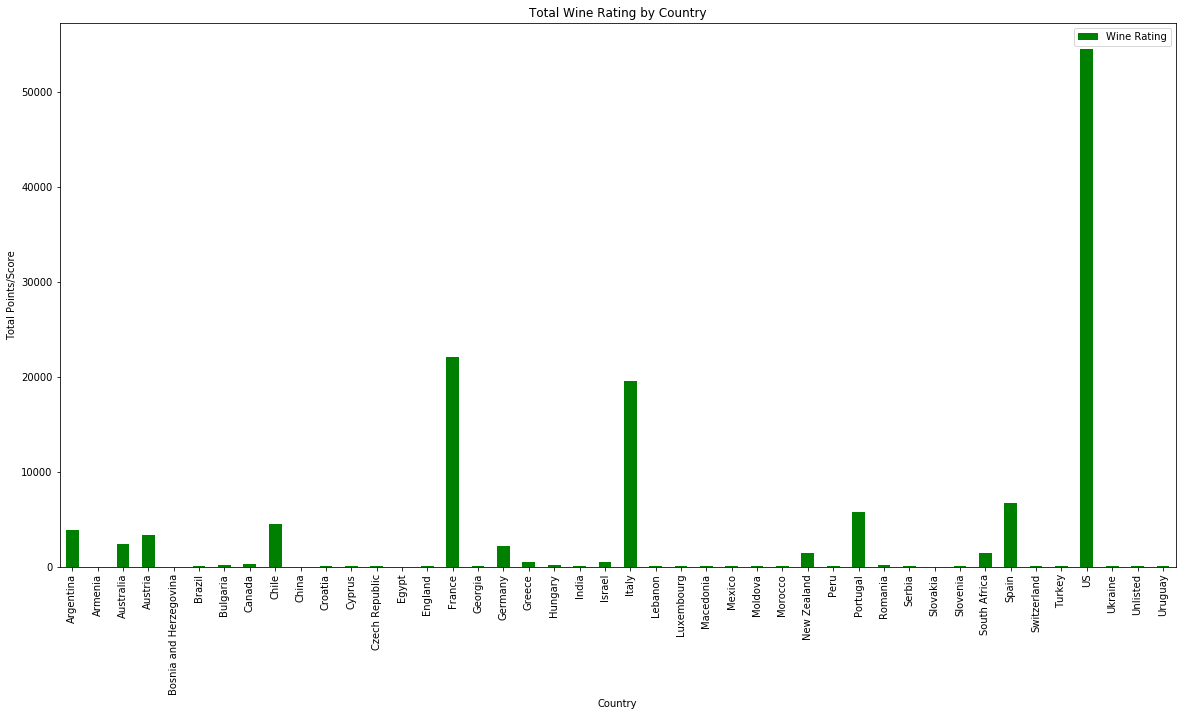

<Figure size 432x288 with 0 Axes>

In [19]:
# Use DataFrame.plot() in order to create a bar chart of the data
wine_score_country.plot(kind="bar", color="g", figsize=(20,10))

# Set a title for the chart
plt.title("Total Wine Rating by Country")

plt.xlabel("Country")
plt.ylabel("Total Points/Score")

plt.savefig('Total_Wine_Rating_byCountry.png')

plt.show()
plt.tight_layout()


In [20]:
# Avg wine rating by country

avg_wine_rating_country = wine_rating_country.groupby(["Countries"]).mean()
avg_wine_rating_country.head()


,Wine Rating
Countries,
Argentina,86.710263
Armenia,87.500000
Australia,88.580507
Austria,90.101345
Bosnia and Herzegovina,86.500000


In [21]:
# Repetition of Appellation/geographic regions within a Province in dataset (grouped and counted by province name)
# implies 'x' number of wineries/geographic regions in a particular province etc..
# Breakdown for most popular provinces making wine 
# Most popular wineries making wine 

wine_score_province = wine_rating_province.groupby(["Province"]).count()

wine_score_province_df = wine_score_province.rename(columns={"Province":"Province", "Wine Rating":"Appellations within Province"})

wine_score_province_df.head()


,Appellations within Province
Province,
Achaia,5
Aconcagua Costa,27
Aconcagua Valley,116
Aegean,22
Agioritikos,3


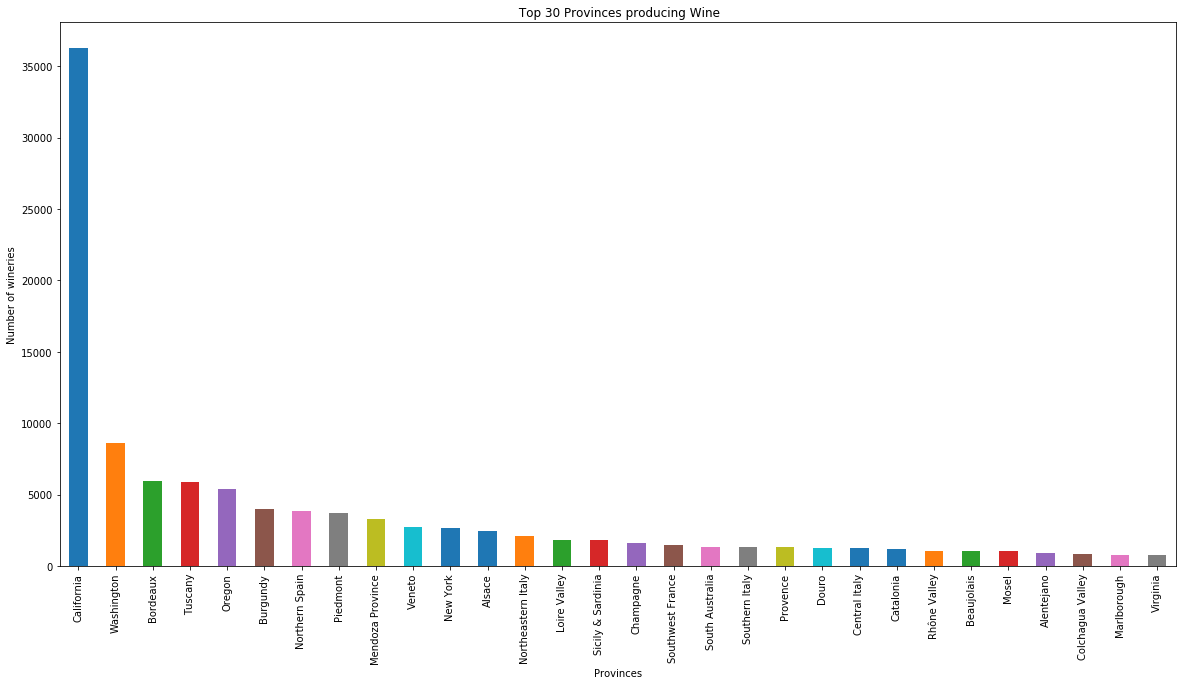

<Figure size 432x288 with 0 Axes>

In [22]:
specific_columns_df["Province"].value_counts().head(30).plot.bar(figsize=(20,10))
plt.title(" Top 30 Provinces producing Wine")

plt.xlabel("Provinces")
plt.ylabel("Number of wineries")

#plt.legend("popularity", loc="best")

plt.savefig('Top30producers.png')

plt.show()
plt.tight_layout()


In [23]:
# Wineries grouped and counted by country and province
#Counts number of wineries/vineyards in the region and number of times its wine has been scored. 

winery_grouped_province = specific_columns_df.groupby(["Countries", "Province", "Winery"]).count()
winery_grouped_province.head()

Appellation  Wine Rating
Countries Province         Winery                                  
Argentina Mendoza Province 2 Copas                   1            1
                           Achaval-Ferrer           18           18
                           Aconcagua                 3            3
                           Aconga                    5            5
                           Acordeón                  4            4

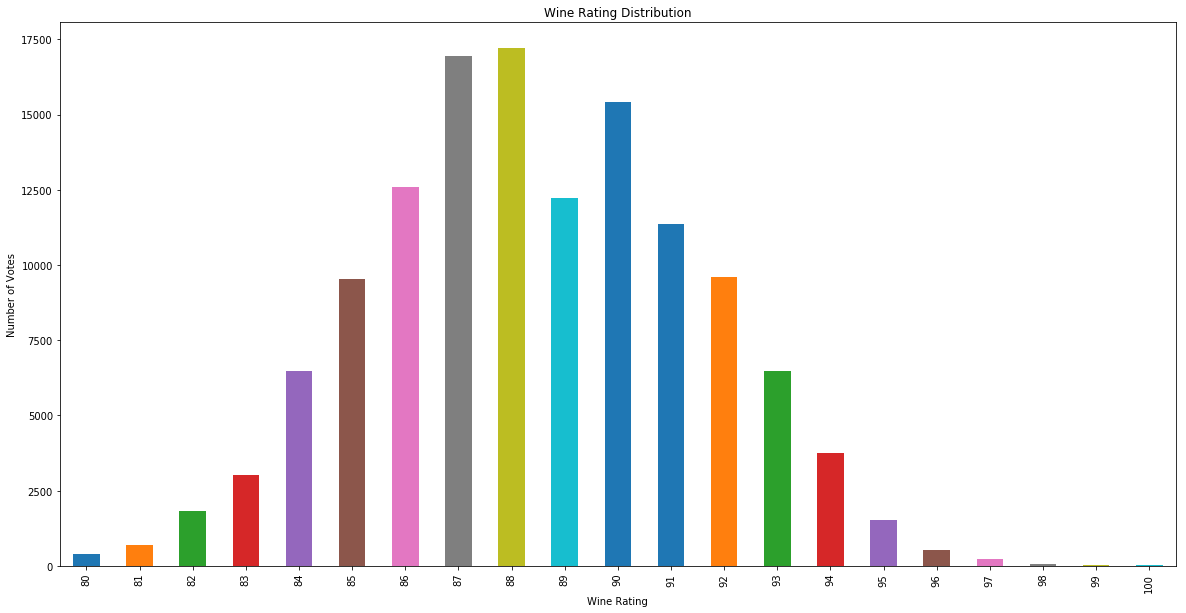

<Figure size 432x288 with 0 Axes>

In [24]:
# wine rating distribution
# number of votes for particular rating in dataset

specific_columns_df["Wine Rating"].value_counts().sort_index().plot.bar(figsize=(20,10))

plt.title("Wine Rating Distribution")

plt.xlabel("Wine Rating")
plt.ylabel("Number of Votes")

#plt.legend("popularity", loc="best")

plt.savefig('WineRatings.png')

plt.show()
plt.tight_layout()


In [25]:
# Previous graph results can be corroborated by subsequent graph
# Wine ratings bins....

df = specific_columns_df[["Province","Wine Rating"]]

# Score count

score_80 = df[(df["Wine Rating"] >= 80) & (df["Wine Rating"] <= 84)].count()[0]
score_85 = df[(df["Wine Rating"] >= 85) & (df["Wine Rating"] <= 89)].count()[0]
score_90 = df[(df["Wine Rating"] >= 90) & (df["Wine Rating"] <= 94)].count()[0]
score_95 = df[(df["Wine Rating"] >= 95) & (df["Wine Rating"] <= 100)].count()[0]
scores = [score_80, score_85, score_90, score_95]

# Creating the dictionary
wine_rating_dict = {
         "Avg. Wine Ratings": scores
    }
    
# Creating DataFrame & setting index
wine_rating_dict = pd.DataFrame(wine_rating_dict)
wine_rating_dict.index = (["80-84", "85-89", "90-94", "95-100"])
wine_rating_dict


,Avg. Wine Ratings
80-84,12430
85-89,68496
90-94,46629
95-100,2416


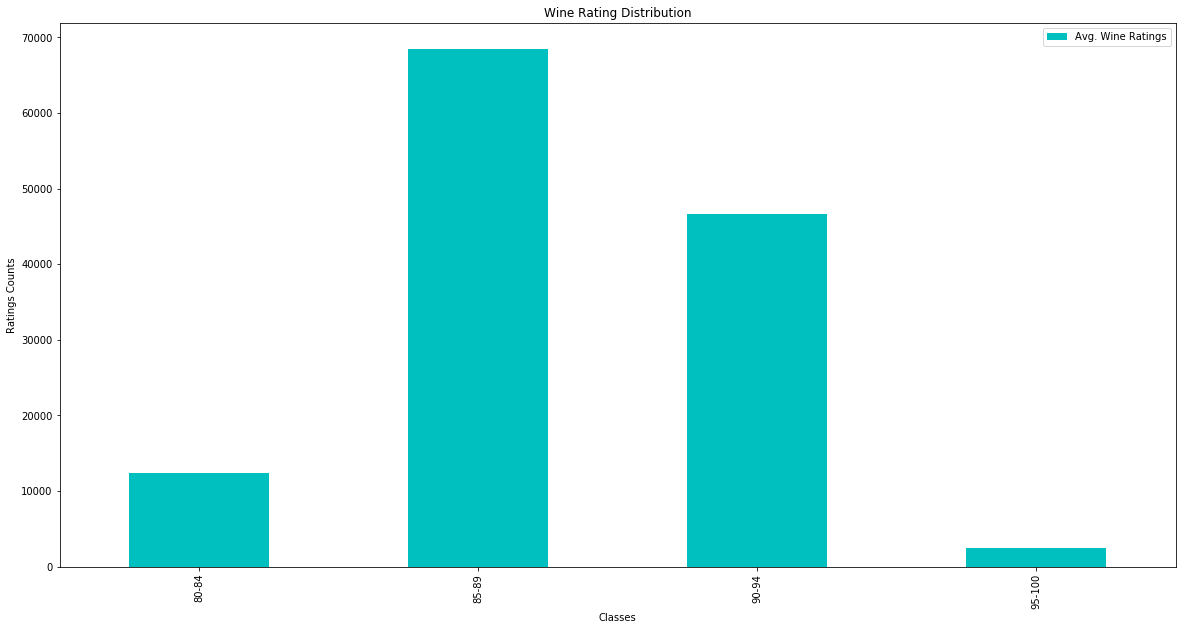

<Figure size 432x288 with 0 Axes>

In [26]:
# Use DataFrame.plot() in order to create a bar chart of the data
wine_rating_dict.plot(kind="bar", color="c", figsize=(20,10))

# Set a title for the chart
plt.title("Wine Rating Distribution")

plt.xlabel("Classes")
plt.ylabel("Ratings Counts")

plt.savefig('Wine rating Distribution.png')

plt.show()
plt.tight_layout()


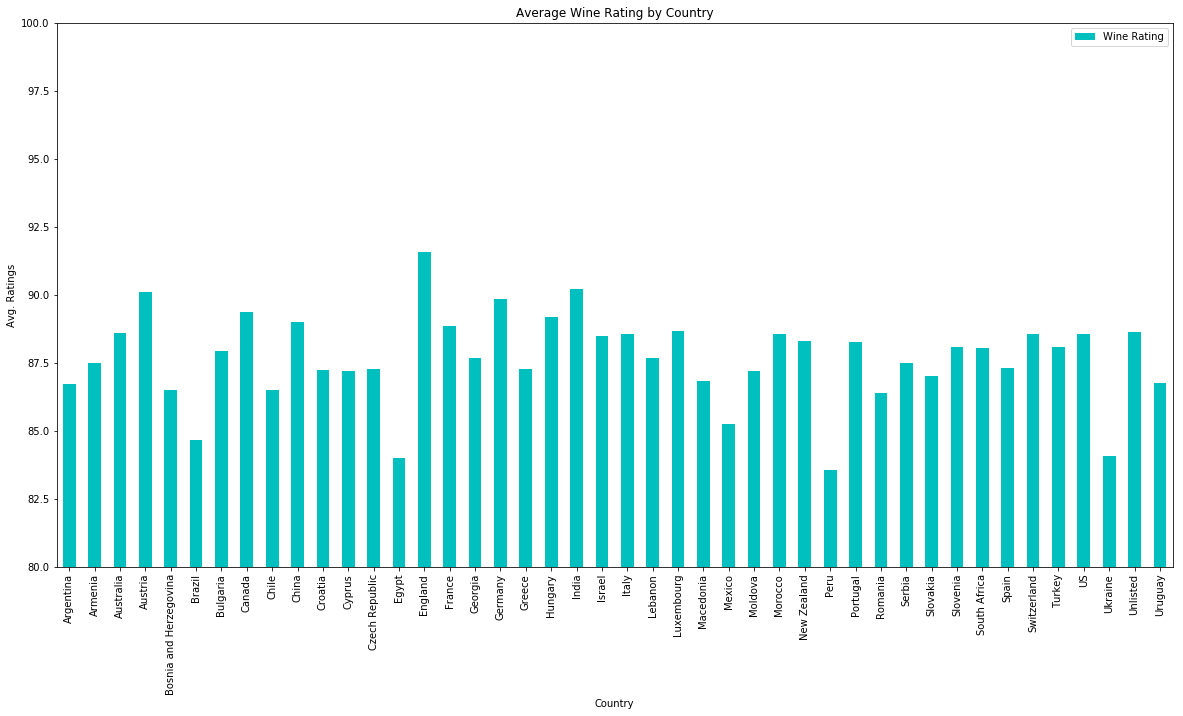

<Figure size 432x288 with 0 Axes>

In [27]:
# Use DataFrame.plot() in order to create a bar chart of the data

avg_wine_rating_country.plot(kind="bar", color="c", figsize=(20,10))

# Set a title for the chart

plt.ylim(ymin=80)
plt.ylim(ymax=100)
plt.title("Average Wine Rating by Country")

plt.xlabel("Country")
plt.ylabel("Avg. Ratings")

plt.savefig('Avg_Rating_byCountry.png')

plt.show()
plt.tight_layout()
